In [1]:
####################################
#   SETUP (Equivalent to "Imports")
####################################
import torch
import torch.nn.functional as F
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt
import os

print("PyTorch version:", torch.__version__)

# For reproducibility of random numbers
torch.manual_seed(1)
np.random.seed(1)


PyTorch version: 2.0.1


In [2]:
#############################################
#   Creating tensors in PyTorch
#############################################

# Equivalent to "a = np.array([...])" and "t_a = tf.convert_to_tensor(a)"
a_np = np.array([1, 2, 3], dtype=np.int32)
b_list = [4, 5, 6]

t_a = torch.tensor(a_np)       # from numpy array
t_b = torch.tensor(b_list)     # from list

print("t_a:", t_a)
print("t_b:", t_b)
print("Is 'a_np' a tensor?", torch.is_tensor(a_np))
print("Is 't_a' a tensor?", torch.is_tensor(t_a))

# Create a 2x3 tensor of ones
t_ones = torch.ones((2, 3))
print("t_ones shape:", t_ones.shape)
print("t_ones:\n", t_ones)

# Create a constant tensor in float32
const_tensor = torch.tensor([1.2, 5, np.pi], dtype=torch.float32)
print("const_tensor:", const_tensor)


t_a: tensor([1, 2, 3], dtype=torch.int32)
t_b: tensor([4, 5, 6])
Is 'a_np' a tensor? False
Is 't_a' a tensor? True
t_ones shape: torch.Size([2, 3])
t_ones:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
const_tensor: tensor([1.2000, 5.0000, 3.1416])


In [3]:
# Changing the data type
t_a_new = t_a.to(torch.int64)
print("t_a_new.dtype:", t_a_new.dtype)

# Transposing
t = torch.rand((3, 5))  # uniform random
t_tr = t.t()            # transpose
print("Original shape -> Transposed shape:", t.shape, "->", t_tr.shape)

# Reshaping
t = torch.zeros((30,))
t_reshape = t.reshape((5, 6))
print("Reshaped t shape:", t_reshape.shape)

# Squeezing
t = torch.zeros((1, 2, 1, 4, 1))
t_sqz = torch.squeeze(t, dim=2)     # remove dimension 2
t_sqz = torch.squeeze(t_sqz, dim=3) # or remove dimension 4 if you prefer
# Alternatively, you could do multiple .squeeze() calls or specify them
print("t.shape:", t.shape, "-->", "t_sqz.shape:", t_sqz.shape)


t_a_new.dtype: torch.int64
Original shape -> Transposed shape: torch.Size([3, 5]) -> torch.Size([5, 3])
Reshaped t shape: torch.Size([5, 6])
t.shape: torch.Size([1, 2, 1, 4, 1]) --> t_sqz.shape: torch.Size([1, 2, 4])


In [4]:
torch.manual_seed(1)
t1 = torch.rand((5, 2))*2 - 1.0  # uniform in [-1,1], just to replicate TF
t2 = torch.randn((5, 2))         # normal distribution

# Elementwise multiplication
t3 = t1 * t2
print("t3:\n", t3)

# Reduce mean across dimension 0
t4 = torch.mean(t1, dim=0)
print("t4:\n", t4)

# Matrix multiplication 
t5 = torch.matmul(t1, t2.t())  # (5,2) x (2,5) => (5,5)
print("t5:\n", t5)

t6 = torch.matmul(t1.t(), t2)  # (2,5) x (5,2) => (2,2)
print("t6:\n", t6)

# L2 norm (like tf.norm(..., ord=2, axis=1))
norm_t1 = torch.norm(t1, p=2, dim=1)
print("norm_t1:\n", norm_t1)
# Compare with the numpy version:
print("Check norm with numpy:", np.sqrt(np.sum(t1.numpy()**2, axis=1)))


t3:
 tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])
t4:
 tensor([-0.1373,  0.2028])
t5:
 tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])
t6:
 tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])
norm_t1:
 tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])
Check norm with numpy: [0.67846215 0.5078282  1.1162277  0.5487652  0.18525197]


In [13]:
torch.manual_seed(1)
t = torch.rand((6,))
print("t:", t.numpy())

t_splits = torch.split(t, 2)  # split into chunks of size=2
for idx, item in enumerate(t_splits):
    print(f"Split {idx}:", item.numpy())

# Another approach: split with specific sizes
torch.manual_seed(1)
t = torch.rand((5,))
print("\nNew t:", t.numpy())

t_splits = torch.split(t, [3,2])  # first 3, then 2
for idx, item in enumerate(t_splits):
    print(f"Split {idx}:", item.numpy())

# Concatenate
A = torch.ones((3,))
B = torch.zeros((2,))
C = torch.cat([A, B], dim=0)
print("\nConcatenation:\n", C)

# Stack
A = torch.ones((3,))
B = torch.zeros((3,))
S = torch.stack([A, B], dim=1)
print("\nStack:\n", S)



t: [0.7576316  0.27931088 0.40306926 0.73468447 0.02928156 0.7998586 ]
Split 0: [0.7576316  0.27931088]
Split 1: [0.40306926 0.73468447]
Split 2: [0.02928156 0.7998586 ]

New t: [0.7576316  0.27931088 0.40306926 0.73468447 0.02928156]
Split 0: [0.7576316  0.27931088 0.40306926]
Split 1: [0.73468447 0.02928156]

Concatenation:
 tensor([1., 1., 1., 0., 0.])

Stack:
 tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


In [14]:
from torch.utils.data import Dataset, DataLoader

class TensorDatasetCustom(Dataset):
    """Simple Dataset that takes two tensors X and y and returns them."""
    def __init__(self, x_tensor, y_tensor, transform=None):
        self.x = x_tensor
        self.y = y_tensor
        self.transform = transform
        
    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, idx):
        x_item = self.x[idx]
        y_item = self.y[idx]
        if self.transform is not None:
            x_item = self.transform(x_item)
        return x_item, y_item

# Example usage:
torch.manual_seed(1)
t_x = torch.rand((4, 3), dtype=torch.float32)
t_y = torch.arange(4, dtype=torch.int64)

dataset_joint = TensorDatasetCustom(t_x, t_y)
print("Dataset length:", len(dataset_joint))

for i in range(len(dataset_joint)):
    x_, y_ = dataset_joint[i]
    print(f"Index {i} => x: {x_.numpy()}, y: {y_.item()}")


Dataset length: 4
Index 0 => x: [0.7576316  0.27931088 0.40306926], y: 0
Index 1 => x: [0.73468447 0.02928156 0.7998586 ], y: 1
Index 2 => x: [0.39713734 0.75437194 0.5695085 ], y: 2
Index 3 => x: [0.43877792 0.63868046 0.5246659 ], y: 3


In [15]:
class MultiplyTransform:
    """Example transform that multiplies the input by 2 and subtracts 1."""
    def __call__(self, x):
        return x*2 - 1.0

# Attach the transform:
dataset_transformed = TensorDatasetCustom(t_x, t_y, transform=MultiplyTransform())

for i in range(len(dataset_transformed)):
    x_, y_ = dataset_transformed[i]
    print(f"Index {i} => x: {x_.numpy()}, y: {y_.item()}")


Index 0 => x: [ 0.5152632  -0.44137824 -0.19386148], y: 0
Index 1 => x: [ 0.46936893 -0.9414369   0.59971726], y: 1
Index 2 => x: [-0.20572531  0.5087439   0.13901699], y: 2
Index 3 => x: [-0.12244415  0.27736092  0.04933178], y: 3


In [18]:
# PyTorch DataLoader automatically handles shuffle & batch. 
# "Repeat" is typically done by setting an epoch loop or specifying
# `drop_last` or re-initializing the DataLoader in a training loop.

loader = DataLoader(dataset_joint, batch_size=3, shuffle=True, drop_last=False)

for batch_idx, (x_batch, y_batch) in enumerate(loader):
    print(f"Batch {batch_idx}:")
    print("  X:\n", x_batch)
    print("  Y:", y_batch)

# 'Repeat' in TensorFlow means infinite or limited re-iteration.
# In PyTorch, we just run multiple epochs. For demonstration:

print("\n-- Repeating (simulating multiple epochs) --")
for epoch in range(3):
    for batch_idx, (x_batch, y_batch) in enumerate(loader):
        print(f"Epoch={epoch}, batch={batch_idx}, y={y_batch.tolist()}")


Batch 0:
  X:
 tensor([[0.4388, 0.6387, 0.5247],
        [0.7347, 0.0293, 0.7999],
        [0.7576, 0.2793, 0.4031]])
  Y: tensor([3, 1, 0])
Batch 1:
  X:
 tensor([[0.3971, 0.7544, 0.5695]])
  Y: tensor([2])

-- Repeating (simulating multiple epochs) --
Epoch=0, batch=0, y=[0, 1, 3]
Epoch=0, batch=1, y=[2]
Epoch=1, batch=0, y=[1, 2, 0]
Epoch=1, batch=1, y=[3]
Epoch=2, batch=0, y=[2, 3, 0]
Epoch=2, batch=1, y=[1]


File list: ['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']
Labels: [0, 0, 0, 1, 1, 1]


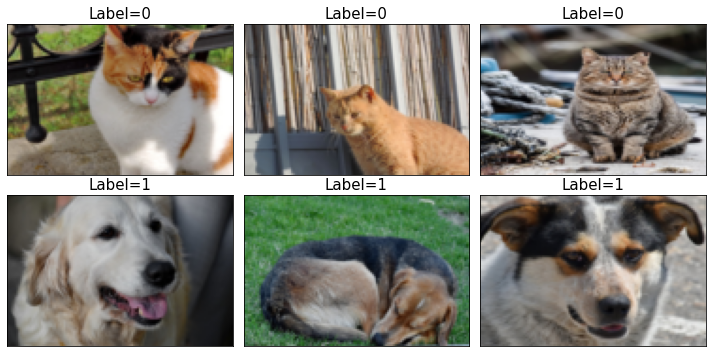

In [20]:
from PIL import Image

class ImageFolderWithPaths(Dataset):
    """
    A custom Dataset for loading images from a list of file paths
    plus their integer label (cat=0, dog=1).
    """
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
        
    def __len__(self):
        return len(self.file_list)
    
    def __getitem__(self, idx):
        path = self.file_list[idx]
        label = self.labels[idx]
        
        image = Image.open(path).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

# Example usage:
imgdir_path = 'cat_dog_images'  # Folder path
file_list = sorted([os.path.join(imgdir_path, f) 
                    for f in os.listdir(imgdir_path) 
                    if f.endswith('.jpg')])
print("File list:", file_list)

# Just as in the TF code: cat=0, dog=1
labels = [1 if 'dog' in os.path.basename(f) else 0 for f in file_list]
print("Labels:", labels)

# Set up a transform to replicate resizing, scaling 1/255, etc.
# In PyTorch, we usually do normalization by (mean,std). For a 
# simple scale to [0,1], we can do transforms.ToTensor(). That
# converts from [0..255] to [0..1] float automatically.
img_width, img_height = 120, 80
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),  # automatically scales to [0,1]
])

catdog_dataset = ImageFolderWithPaths(file_list, labels, transform=transform)

# Show images in a grid:
fig = plt.figure(figsize=(10,5))
for i in range(len(catdog_dataset)):
    image, label = catdog_dataset[i]
    image_np = image.permute(1, 2, 0).numpy()  # CxHxW -> HxWxC
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(image_np)
    ax.set_title(f"Label={label}", size=15)
plt.tight_layout()
plt.show()


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:00<00:00, 23706492.27it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 4639436.76it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found




100%|██████████| 1648877/1648877 [00:00<00:00, 9801836.24it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<00:00, 2540070.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Length of training set: 60000
Length of test set: 10000
Single image shape: torch.Size([1, 28, 28]) Label: 5
Batch-x shape: torch.Size([10, 1, 28, 28])
Batch-y: tensor([8, 3, 1, 4, 7, 6, 1, 9, 4, 8])


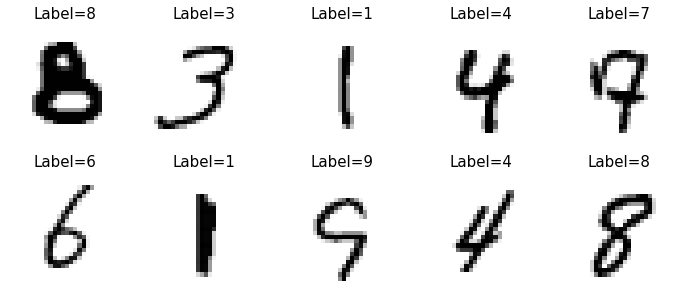

In [21]:
from torchvision.datasets import MNIST

# This will download MNIST and store it in ./data if not present
mnist_train = MNIST(root='./data',
                    train=True,
                    download=True,
                    transform=transforms.ToTensor())

mnist_test = MNIST(root='./data',
                   train=False,
                   download=True,
                   transform=transforms.ToTensor())

print("Length of training set:", len(mnist_train))
print("Length of test set:", len(mnist_test))

# Inspect an item
image, label = mnist_train[0]
print("Single image shape:", image.shape, "Label:", label)

# Create a DataLoader
mnist_train_loader = DataLoader(mnist_train,
                                batch_size=10,
                                shuffle=True)

batch_x, batch_y = next(iter(mnist_train_loader))
print("Batch-x shape:", batch_x.shape)
print("Batch-y:", batch_y)

# Visualize that batch
fig = plt.figure(figsize=(12,5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.imshow(batch_x[i, 0, :, :], cmap='gray_r')
    ax.set_title(f"Label={batch_y[i].item()}", size=15)
    ax.axis('off')
plt.show()
